In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
data=pd.read_csv("/content/Bank_Churn.csv")
df=pd.DataFrame(data)
print(df)

      CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00      

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [73]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
df.dropna()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
file_path = '/content/Bank_Churn.csv'
df = pd.read_csv(file_path)
print(df.head())
print("\nColumns in the dataset:", df.columns.tolist())
if 'Age' in df.columns and 'Income' in df.columns:
    sns.lineplot(x='Age', y='Income', data=df)
    plt.title('Age vs Income')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()
else:
    print("Please replace 'Age' and 'Income' with actual column names from your data.")

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  

Columns in the dataset: ['CustomerId', 'Surname',

In [75]:
file_path = '/content/Bank_Churn.csv'
df = pd.read_csv(file_path)
print(df.head())
print("\nColumns in the dataset:", df.columns.tolist())
if 'Profession' in df.columns and 'Income' in df.columns:
    data_to_plot = df.groupby('Profession')['Income'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data_to_plot.index, y=data_to_plot.values)
    plt.title('Average Income by Profession')
    plt.xlabel('Profession')
    plt.ylabel('Average Income')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Please replace 'Profession' and 'Income' with actual column names from your dataset.")


   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  

Columns in the dataset: ['CustomerId', 'Surname',

In [77]:
file_path = '/content/Bank_Churn.csv'
df = pd.read_csv(file_path)
print("Original Data:")
print(df.head())
label_encoder = LabelEncoder()
label_encoded_df = df.copy()
for column in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])
print("\nLabel Encoded Data:")
print(label_encoded_df.head())
one_hot_encoded_df = pd.get_dummies(df)
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded_df.head())
label_encoded_df.to_csv('/content/Bank_Churn_label_encoded.csv', index=False)
one_hot_encoded_df.to_csv('/content/Bank_Churn_one_hot_encoded.csv', index=False)
print("\nEncoded files have been saved!")


Original Data:
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  

Label Encoded Data:
   CustomerId 

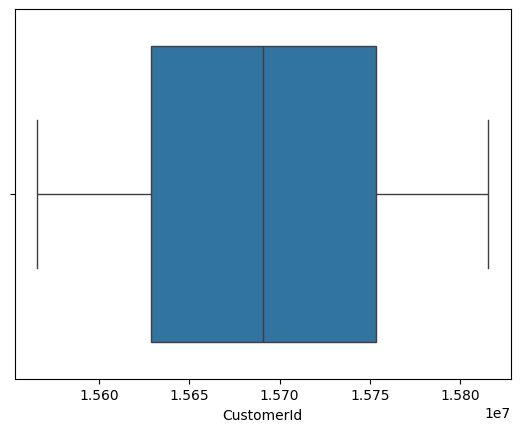

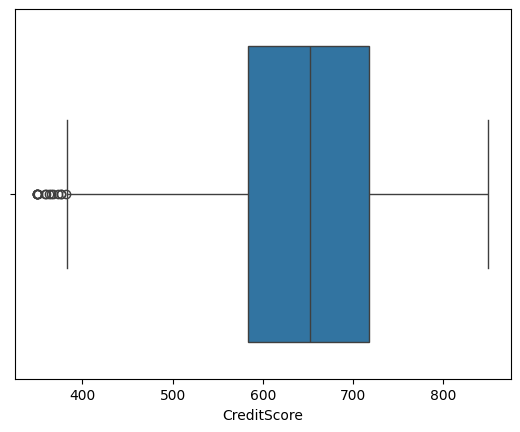

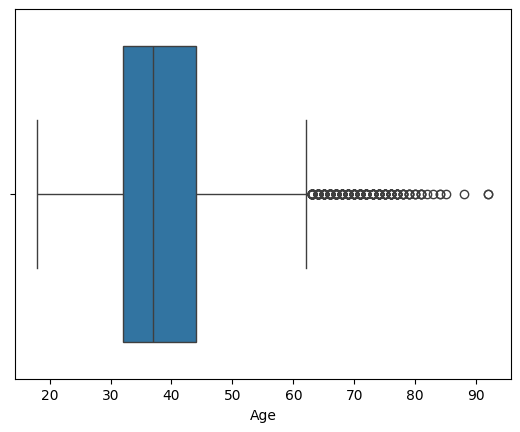

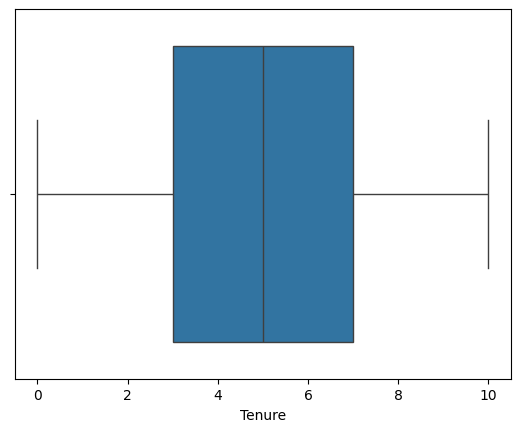

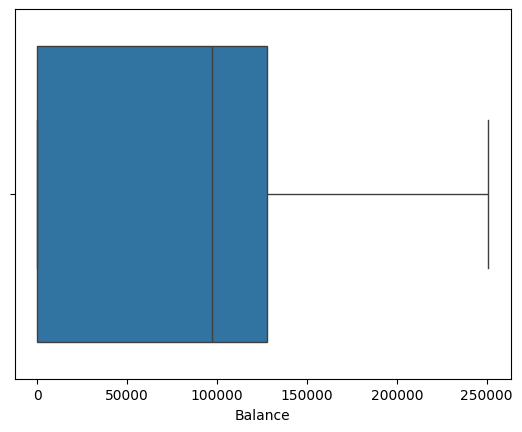

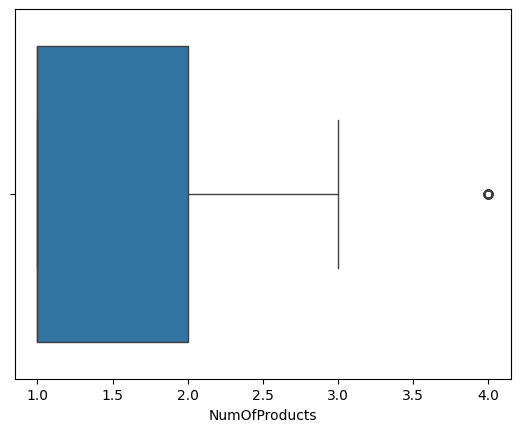

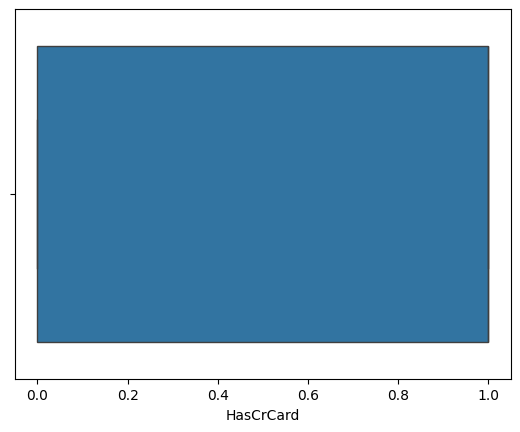

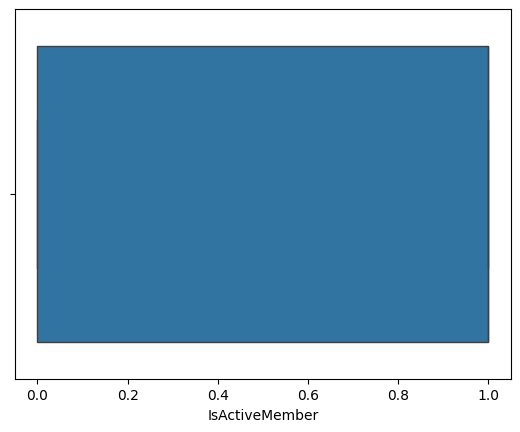

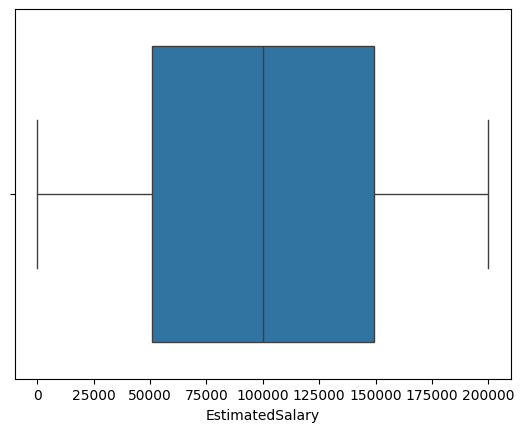

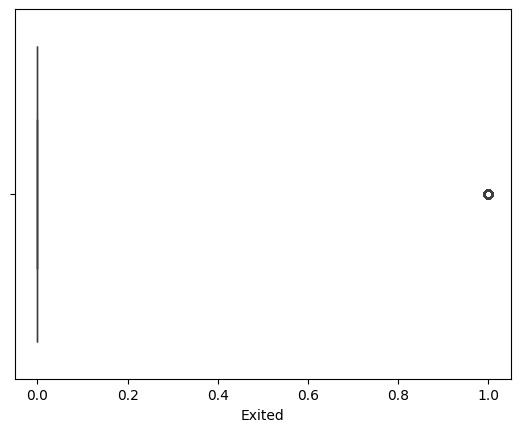

In [9]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
  sns.boxplot(data=num_columns,x=column)
  plt.show()

In [13]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [14]:
df.fillna(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [17]:
df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


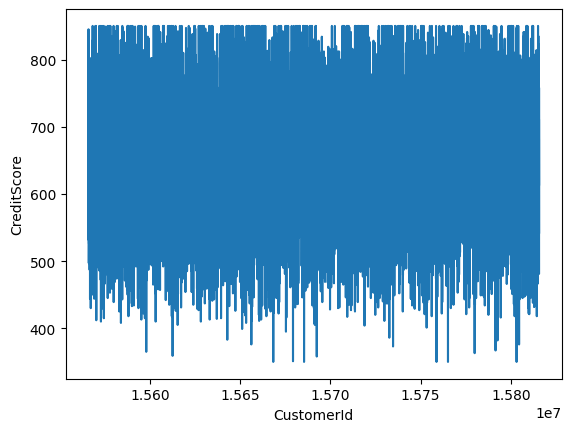

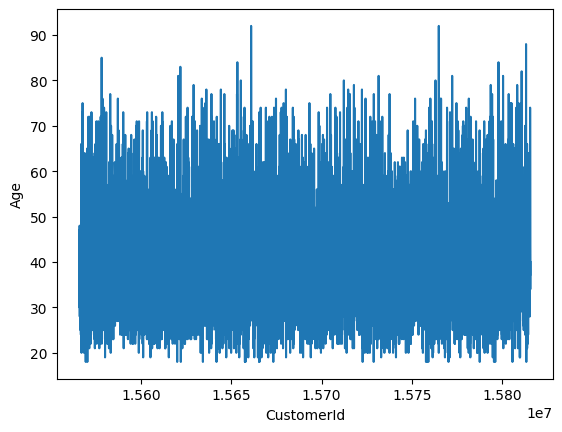

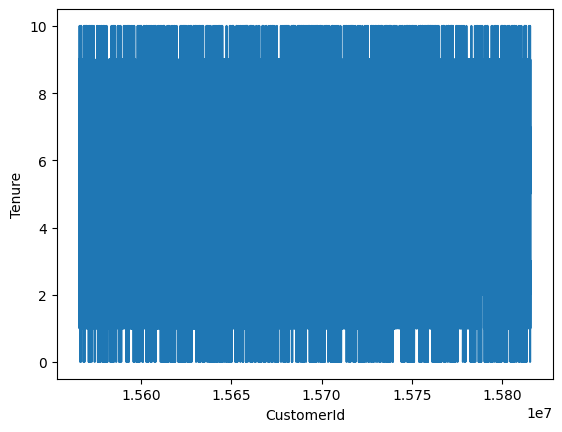

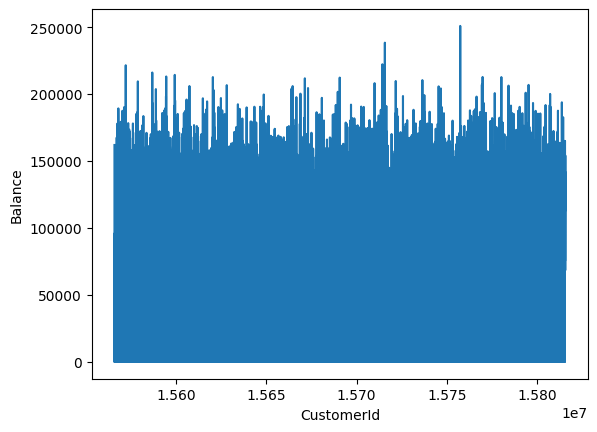

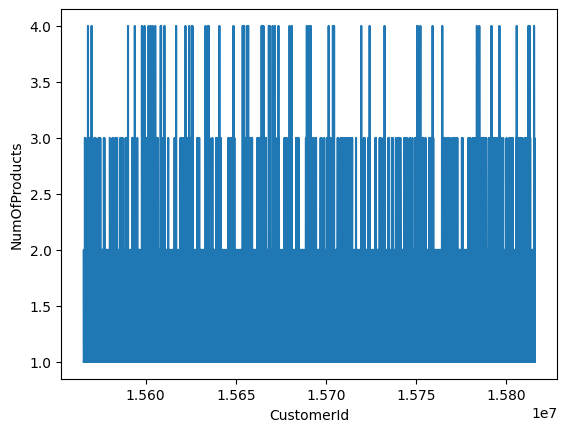

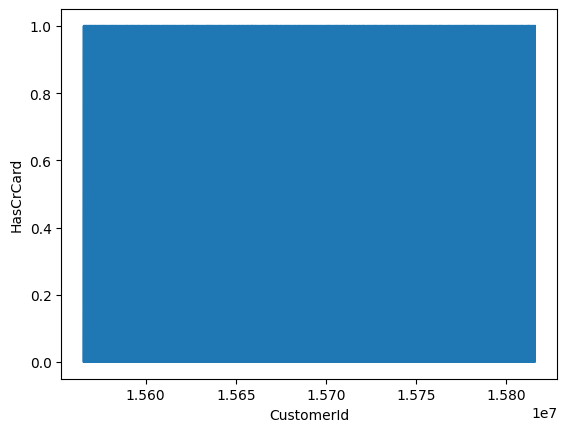

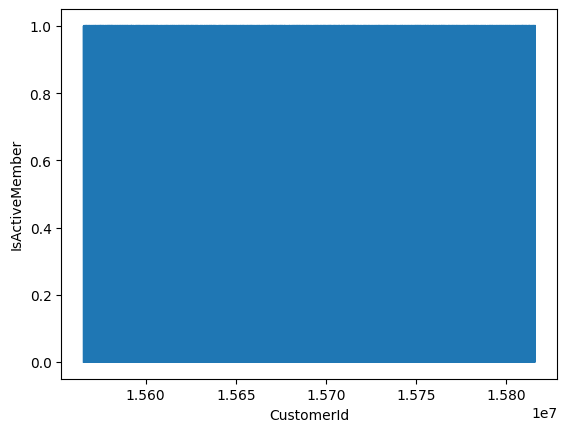

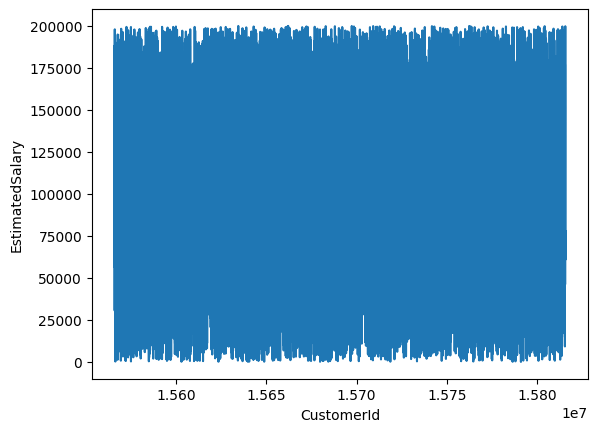

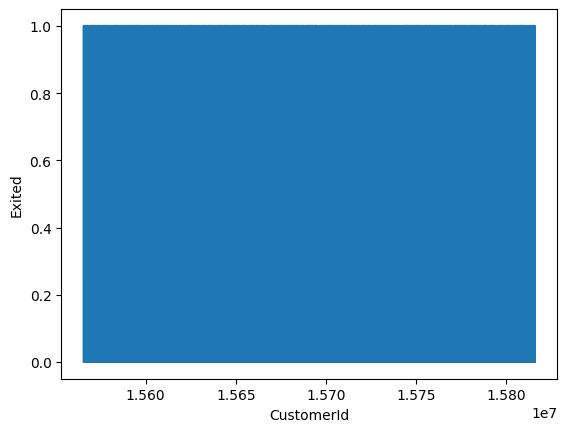

In [19]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
    if column != 'CustomerId':
        sns.lineplot(data=num_columns, x='CustomerId', y=column)
        plt.show()

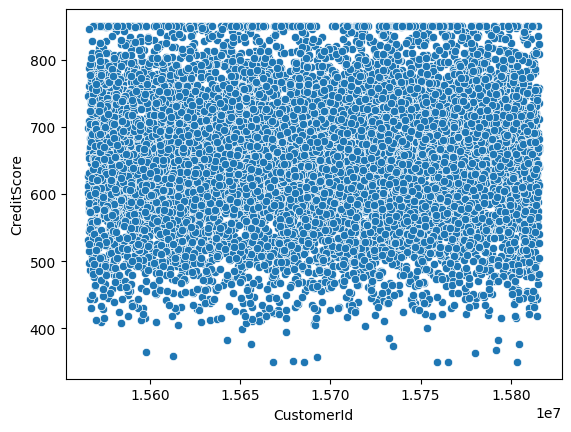

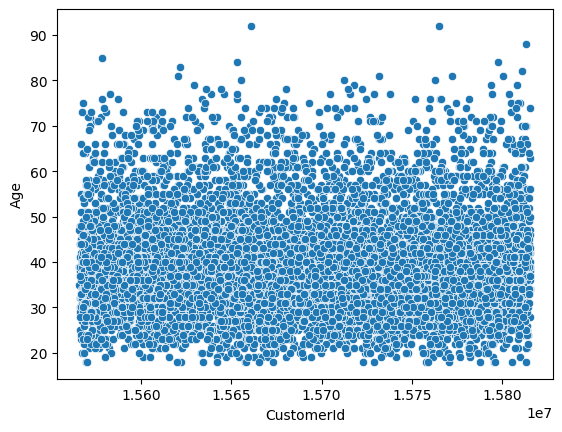

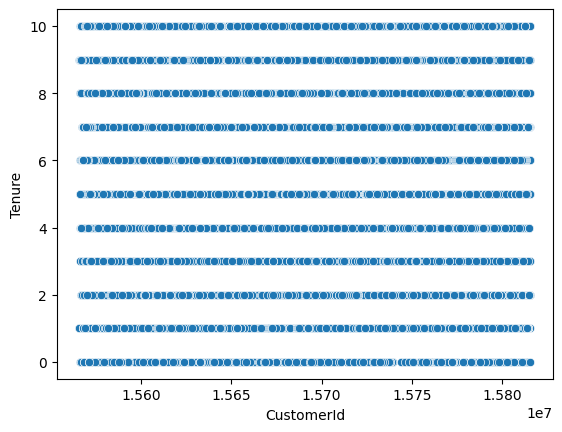

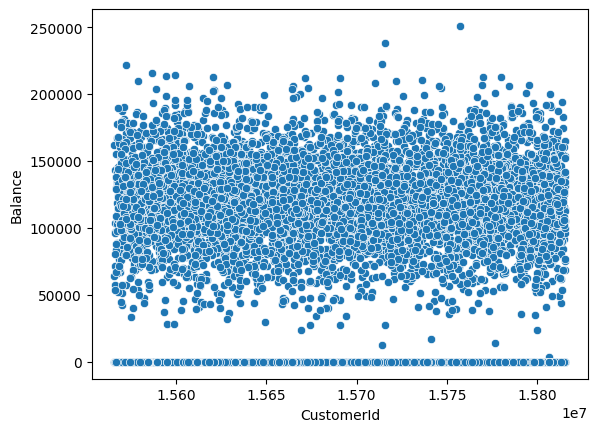

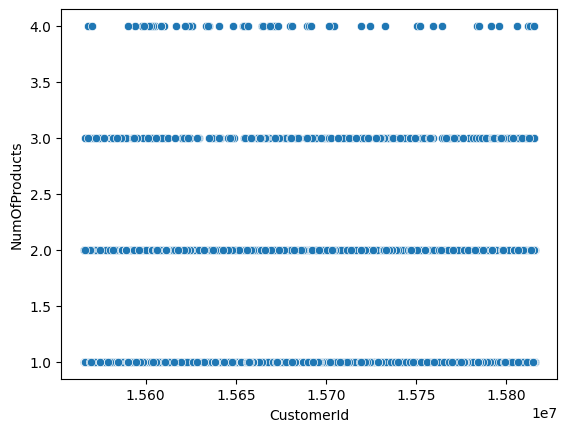

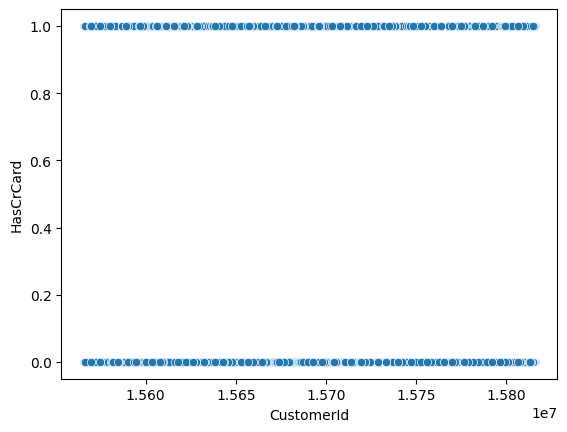

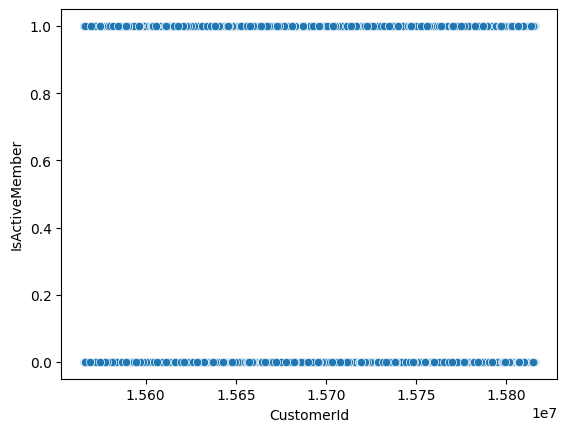

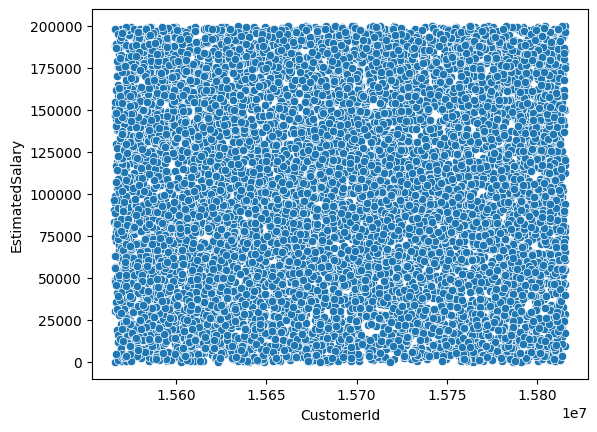

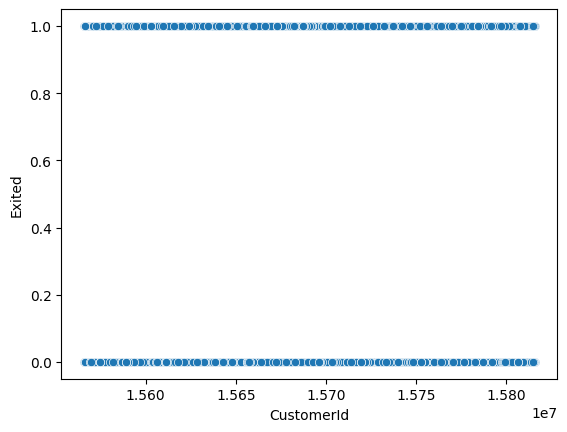

In [20]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
    if column != 'CustomerId':
        sns.scatterplot(data=num_columns, x='CustomerId', y=column)
        plt.show()

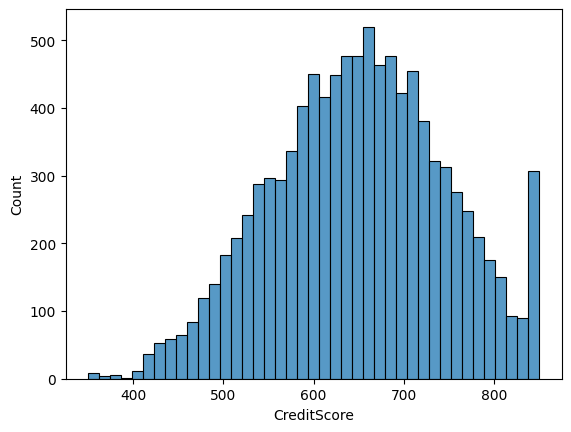

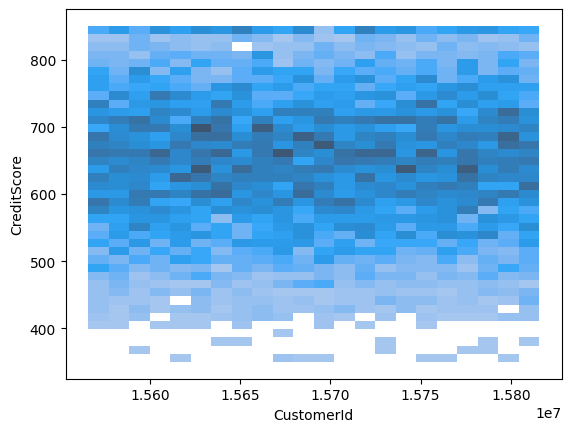

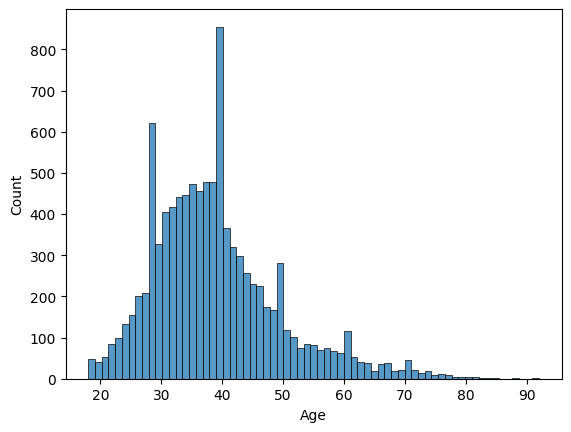

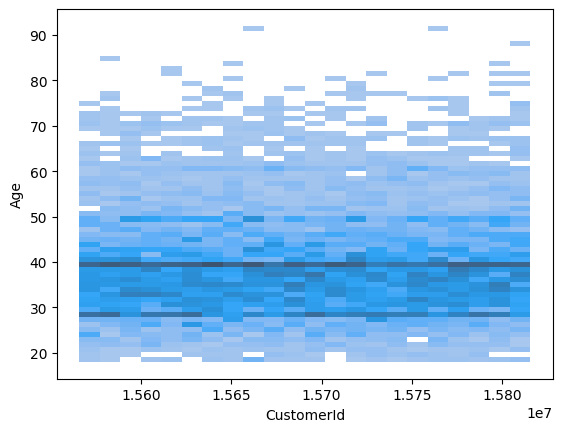

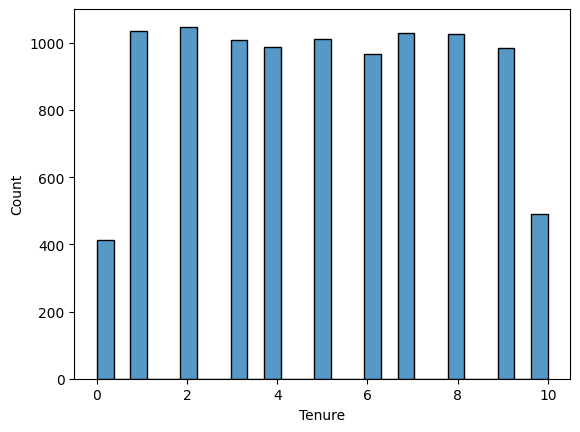

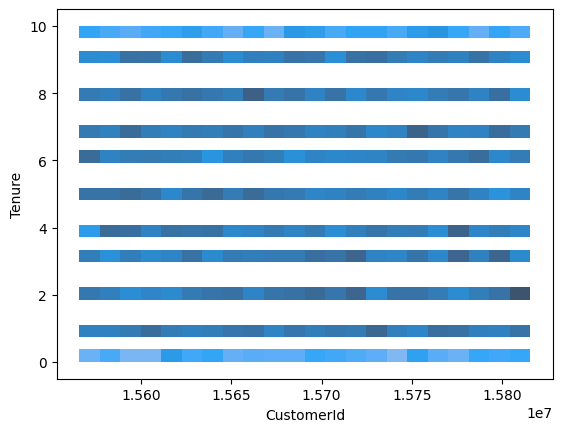

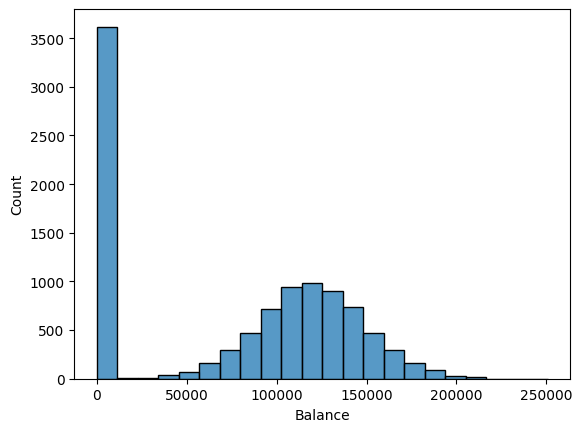

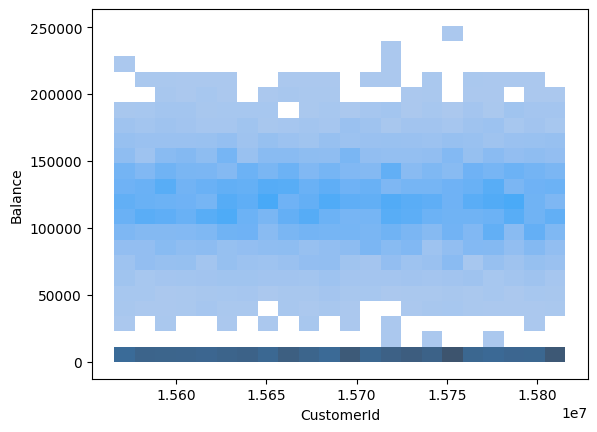

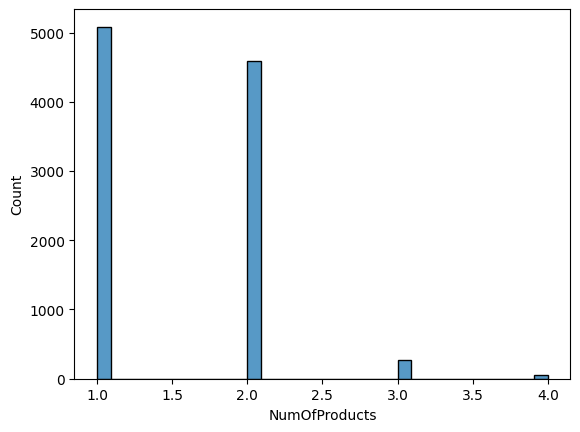

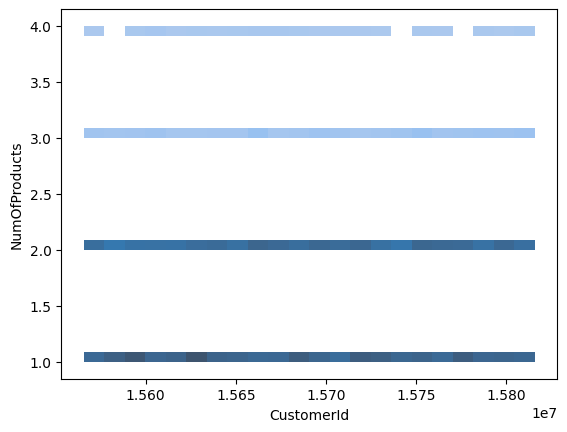

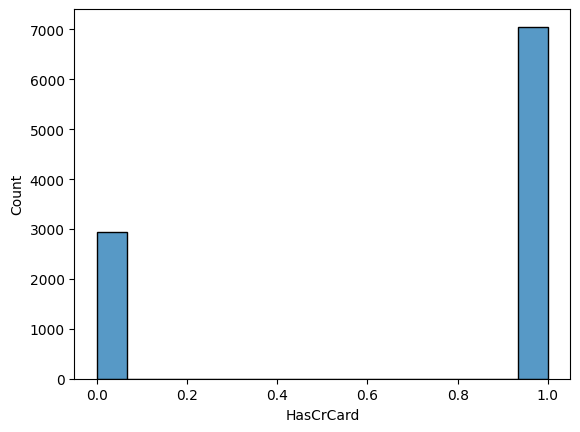

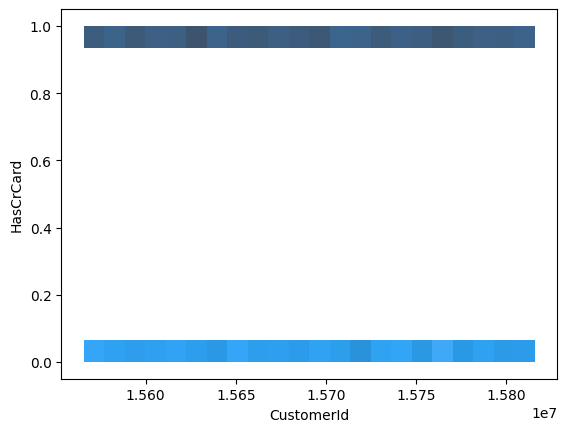

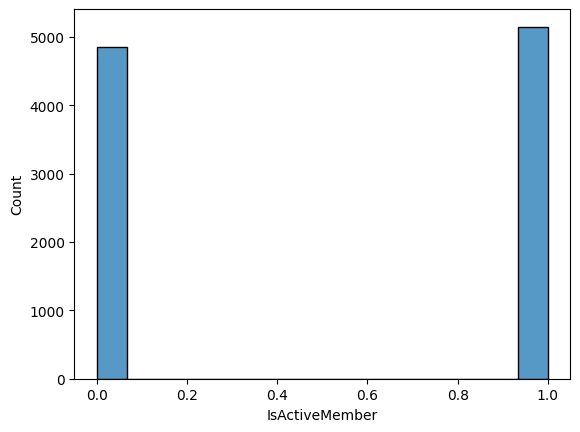

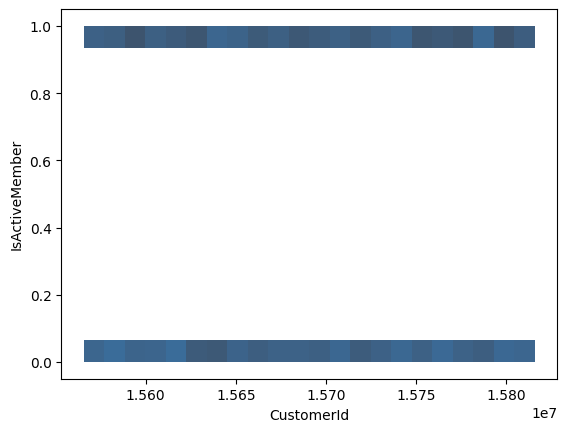

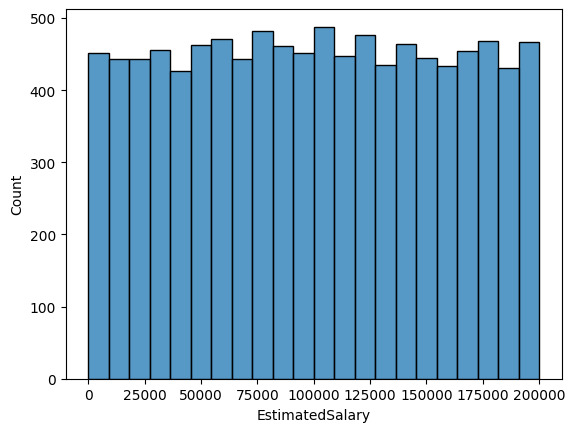

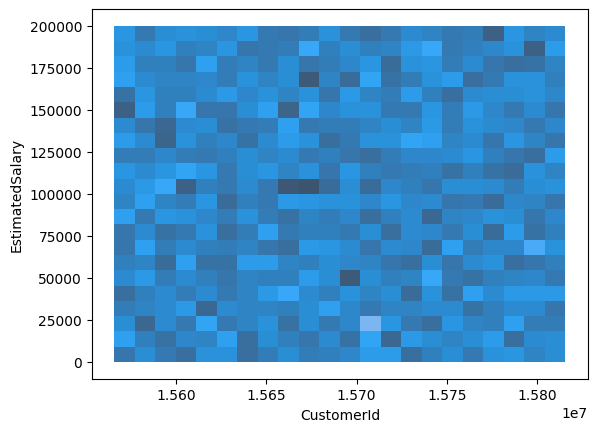

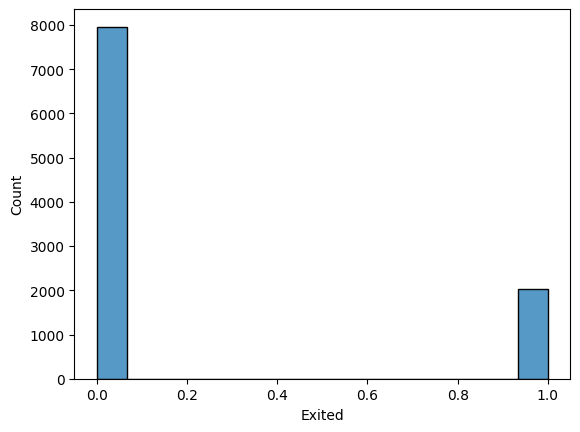

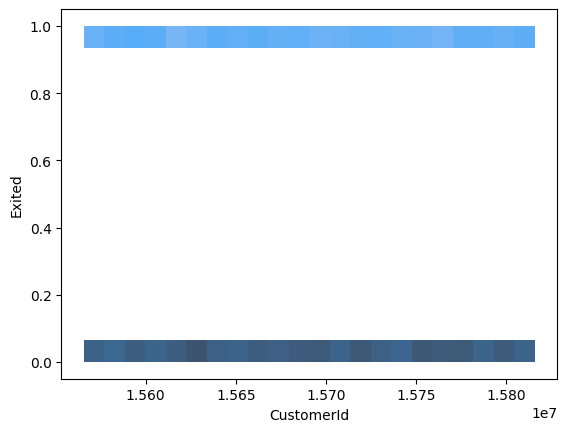

In [23]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
    if column != 'CustomerId':
        sns.histplot(data=num_columns, x=column)
        plt.show()
        sns.histplot(data=num_columns, x='CustomerId', y=column)
        plt.show()

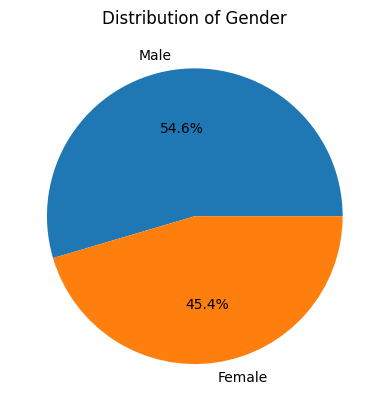

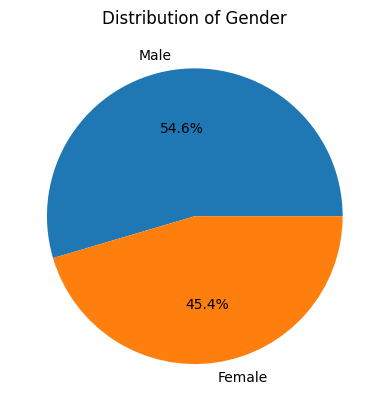

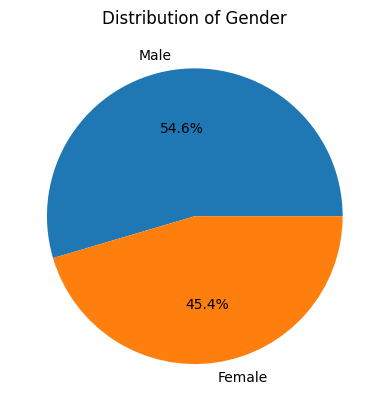

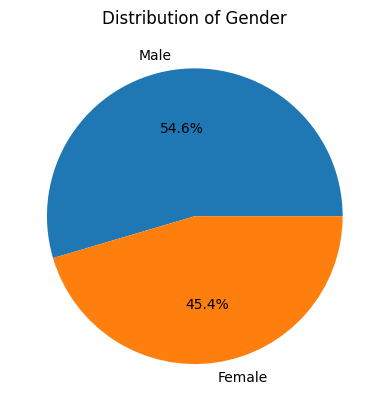

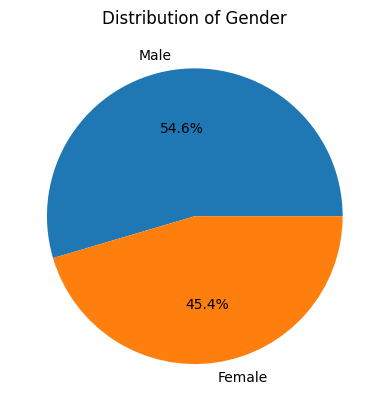

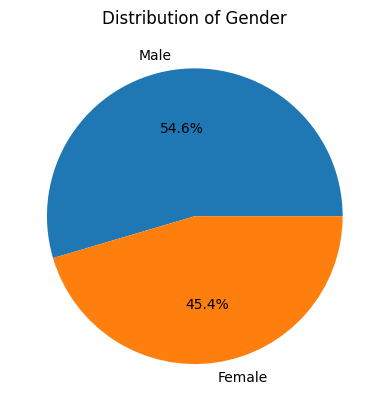

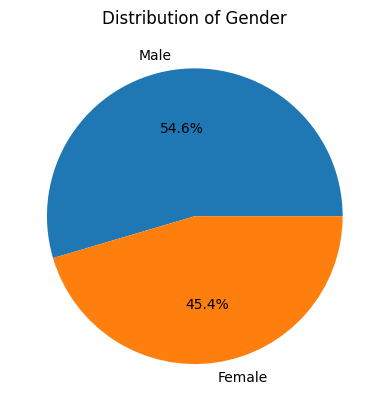

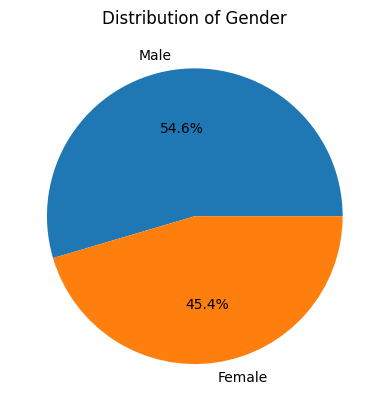

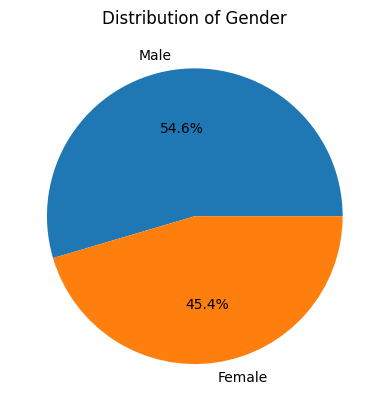

In [80]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
    if column != 'CustomerId':
        categorical_counts = df['Gender'].value_counts()
        plt.pie(categorical_counts, labels=categorical_counts.index, autopct='%1.1f%%')
        plt.title('Distribution of Gender')
        plt.show()

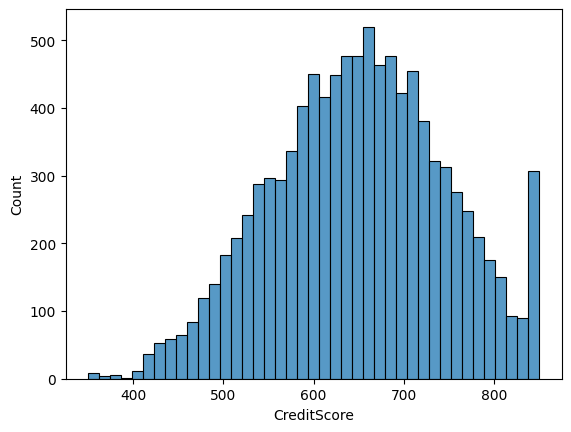

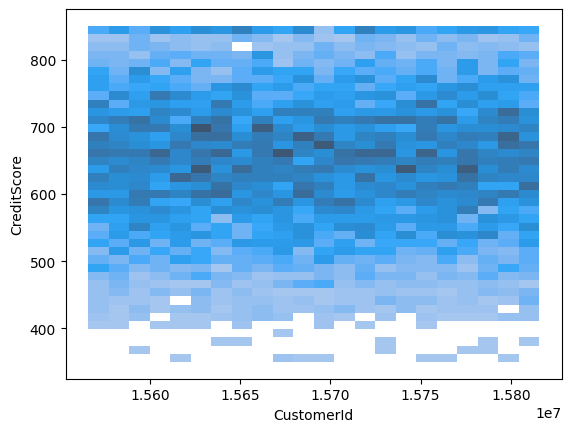

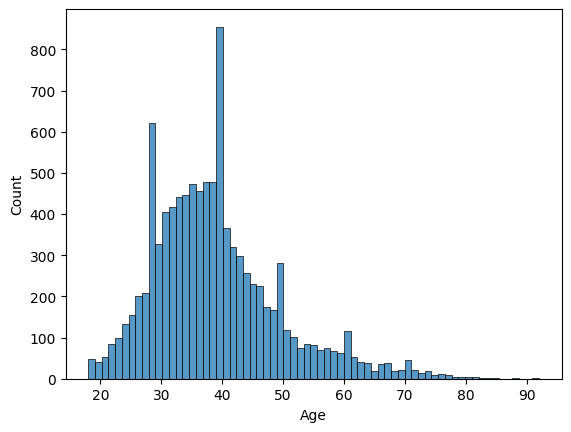

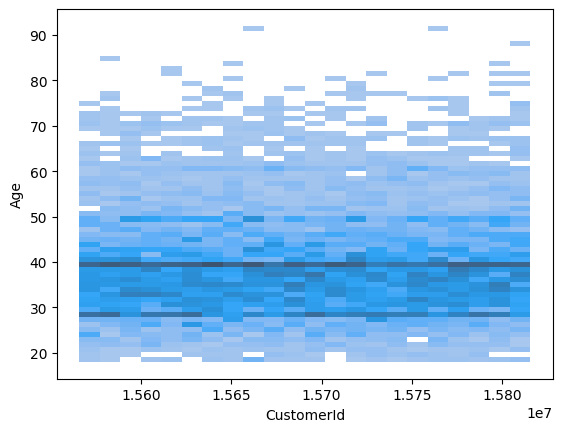

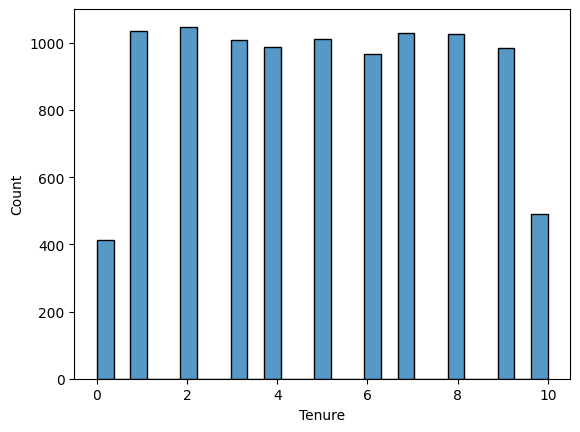

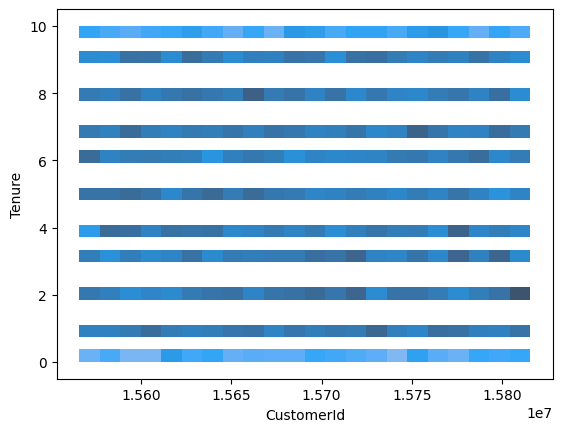

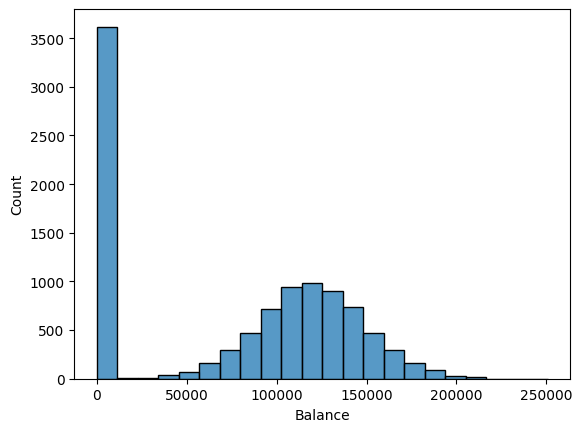

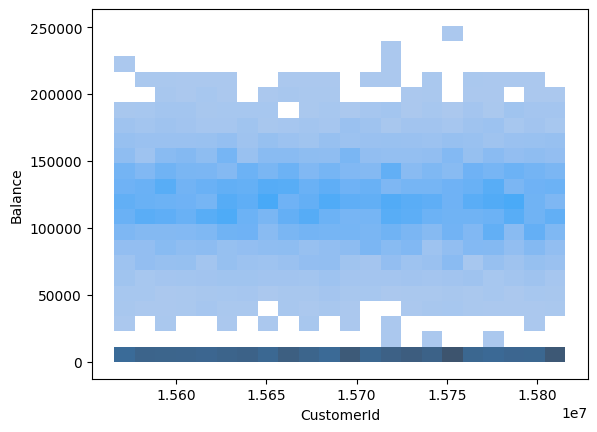

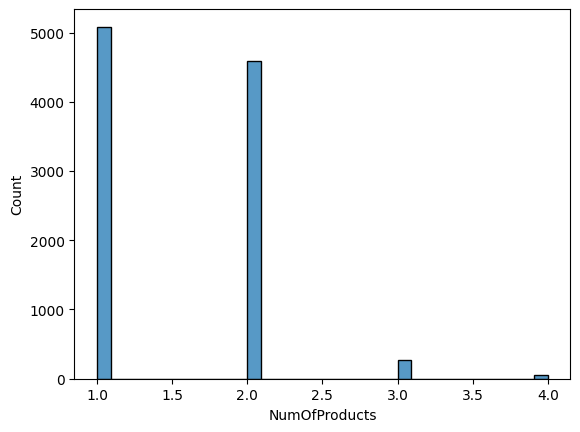

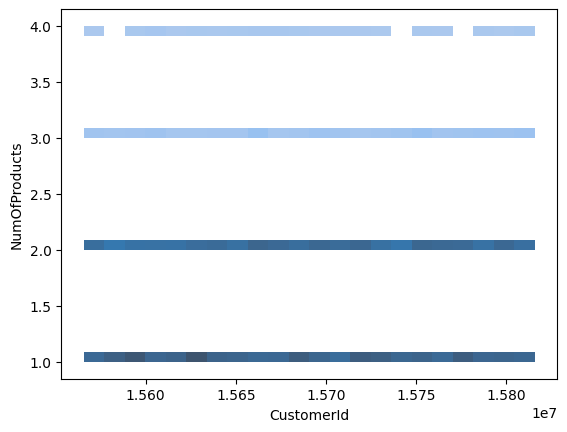

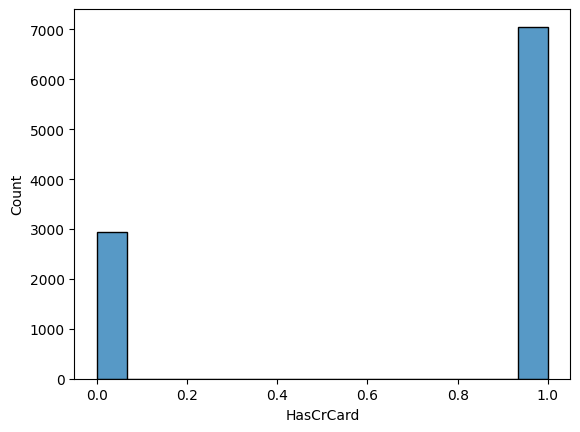

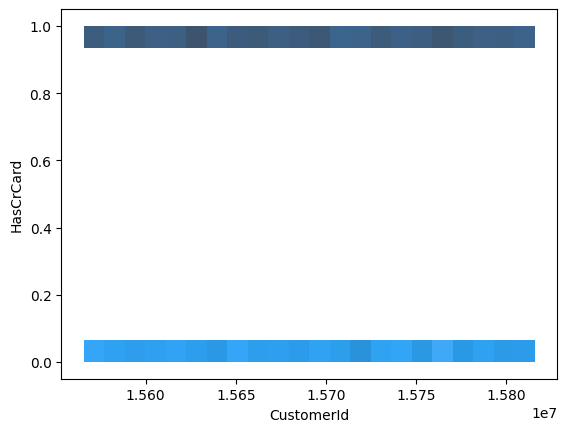

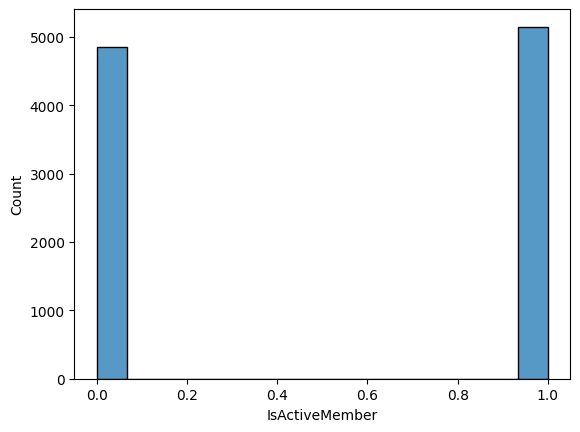

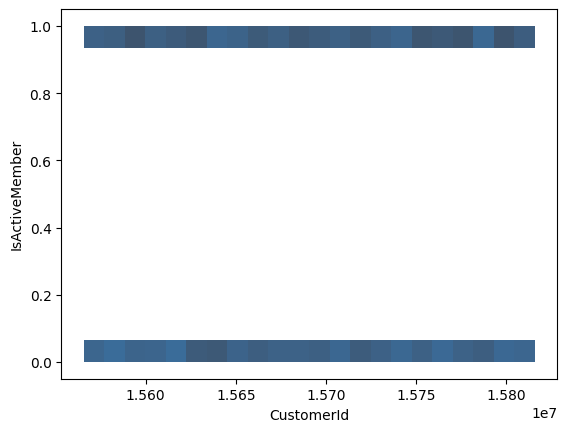

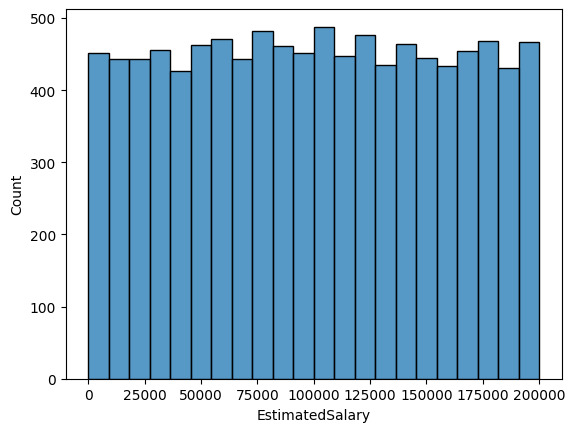

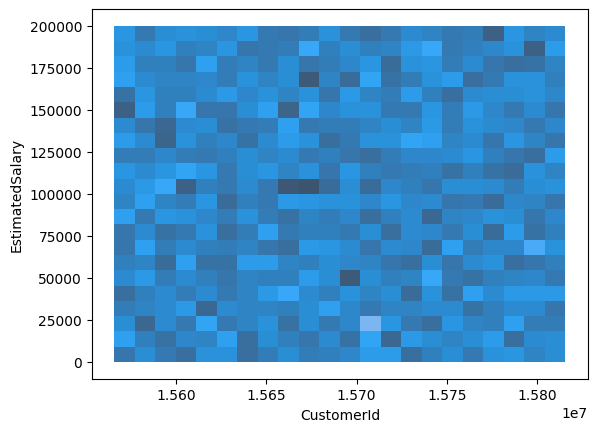

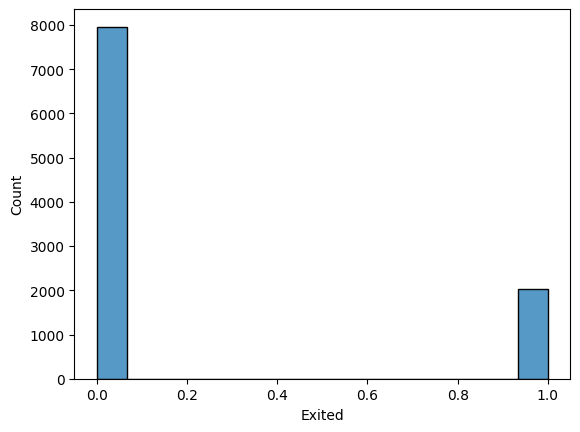

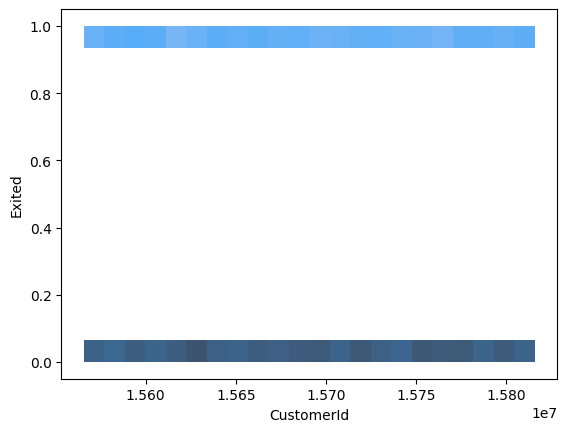

In [82]:
num_columns=df.select_dtypes(include='number')
num_columns.head()
for column in num_columns.columns:
    if column != 'CustomerId':
        sns.histplot(data=num_columns, x=column)
        plt.show()
        sns.histplot(data=num_columns, x='CustomerId', y=column)
        plt.show()

In [46]:
def handling_outliers(df):
  for column in df.select_dtypes(include='number').columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:Lower_bound if x<Lower_bound else Upper_bound if x>Upper_bound else x)
  return df

<Axes: >

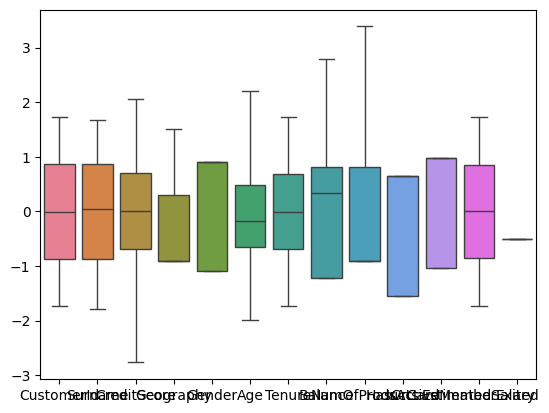

In [41]:
df1 = handling_outliers(df)
sns.boxplot(data=df1)

In [43]:
data={
    'Employee ID':[10,20,15,25,30],
    'Gender':['M','F','F','M','F'],
    'Remark':['Good','Nice','Greate','Nice']
}

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
if 'estimated salary' in df.columns:
    y = df['estimated salary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    Ss = StandardScaler()
    X_test_scaled = Ss.fit_transform(X_test)
    X_train_scaled = Ss.fit_transform(X_train)
else:
    print("Error: 'estimated salary' column not found in DataFrame. Please check your data.")

Error: 'estimated salary' column not found in DataFrame. Please check your data.


In [62]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


classifier = {
    'Logistic_Regression': LogisticRegression(),
    'Decision_Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RFC': RandomForestClassifier()
}



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
print("\n Training models...")
models = {
    'Linear_Regression': LinearRegression(),
    'SVR': SVR(),
    'RF': RandomForestRegressor(random_state=42),
    'Decision_Tree': DecisionTreeRegressor()
}



 Training models...


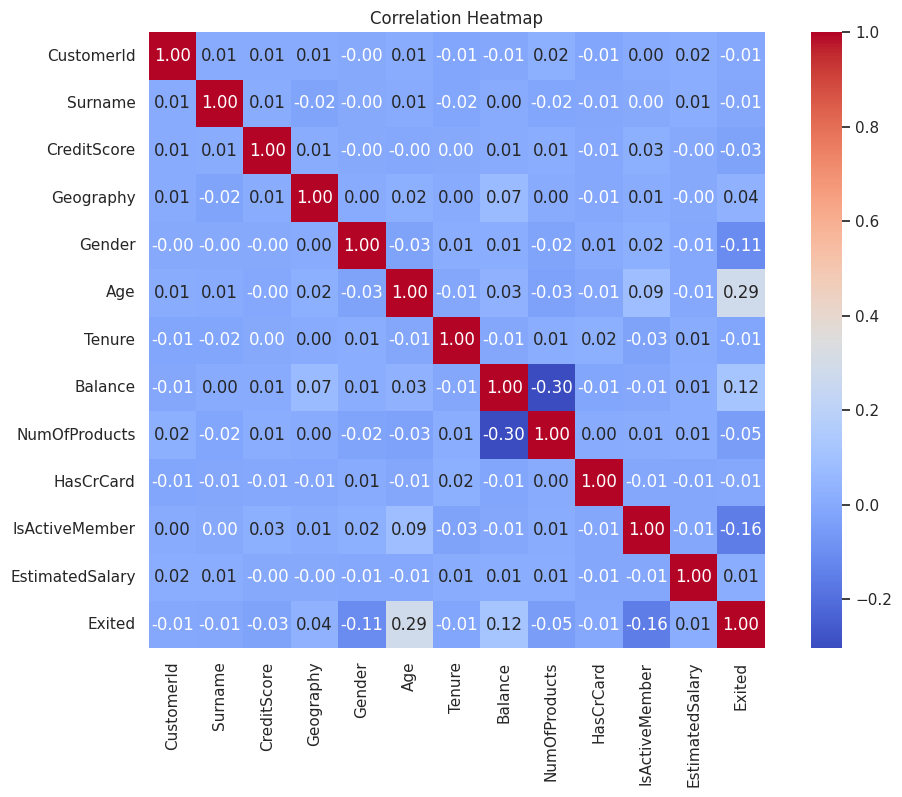

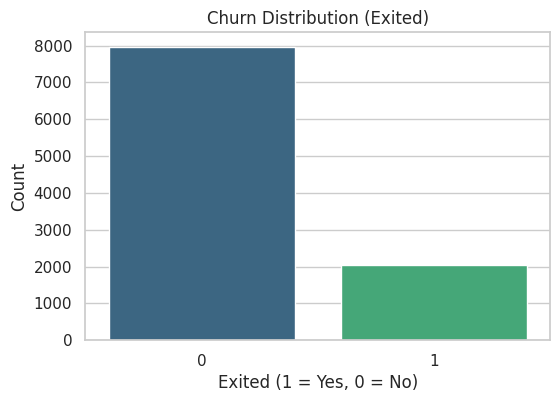

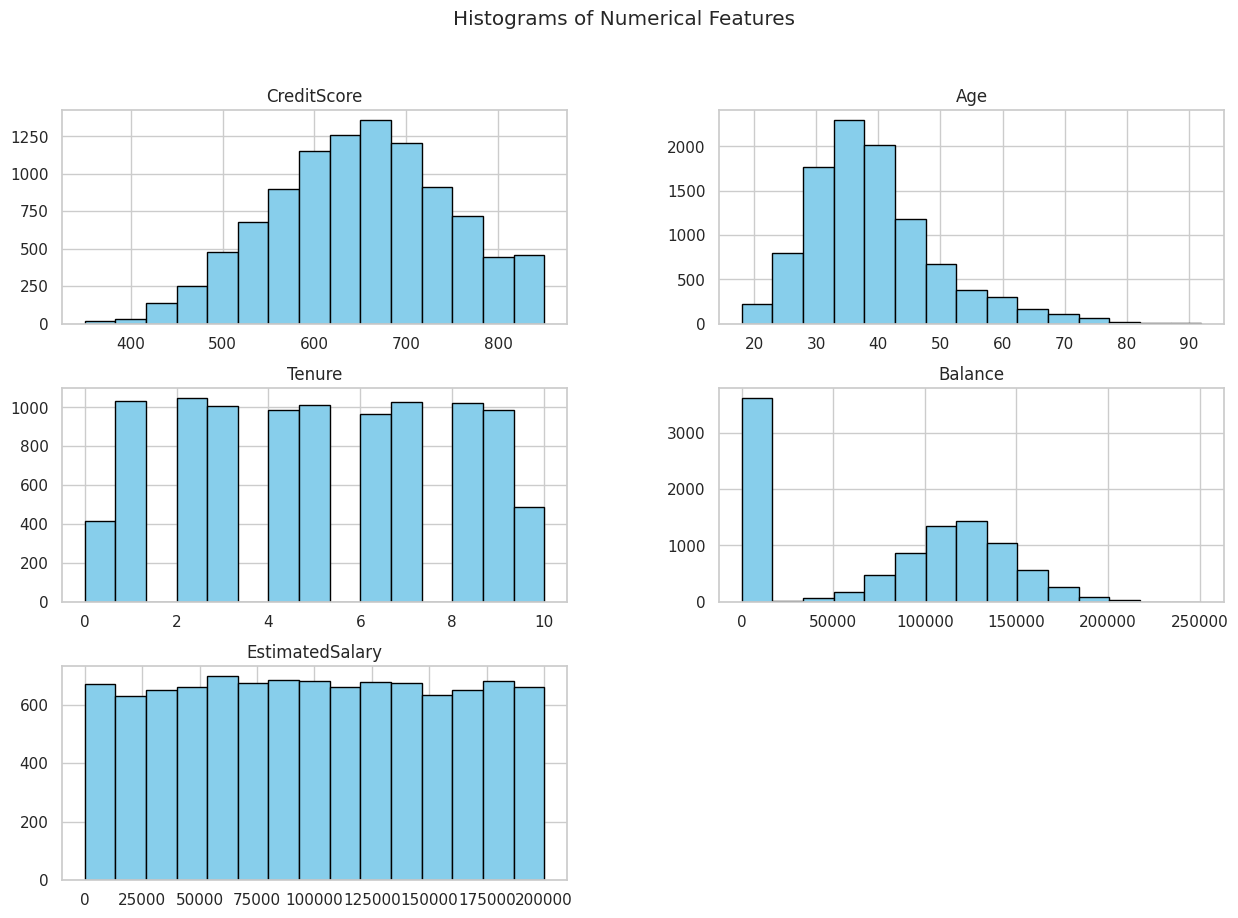

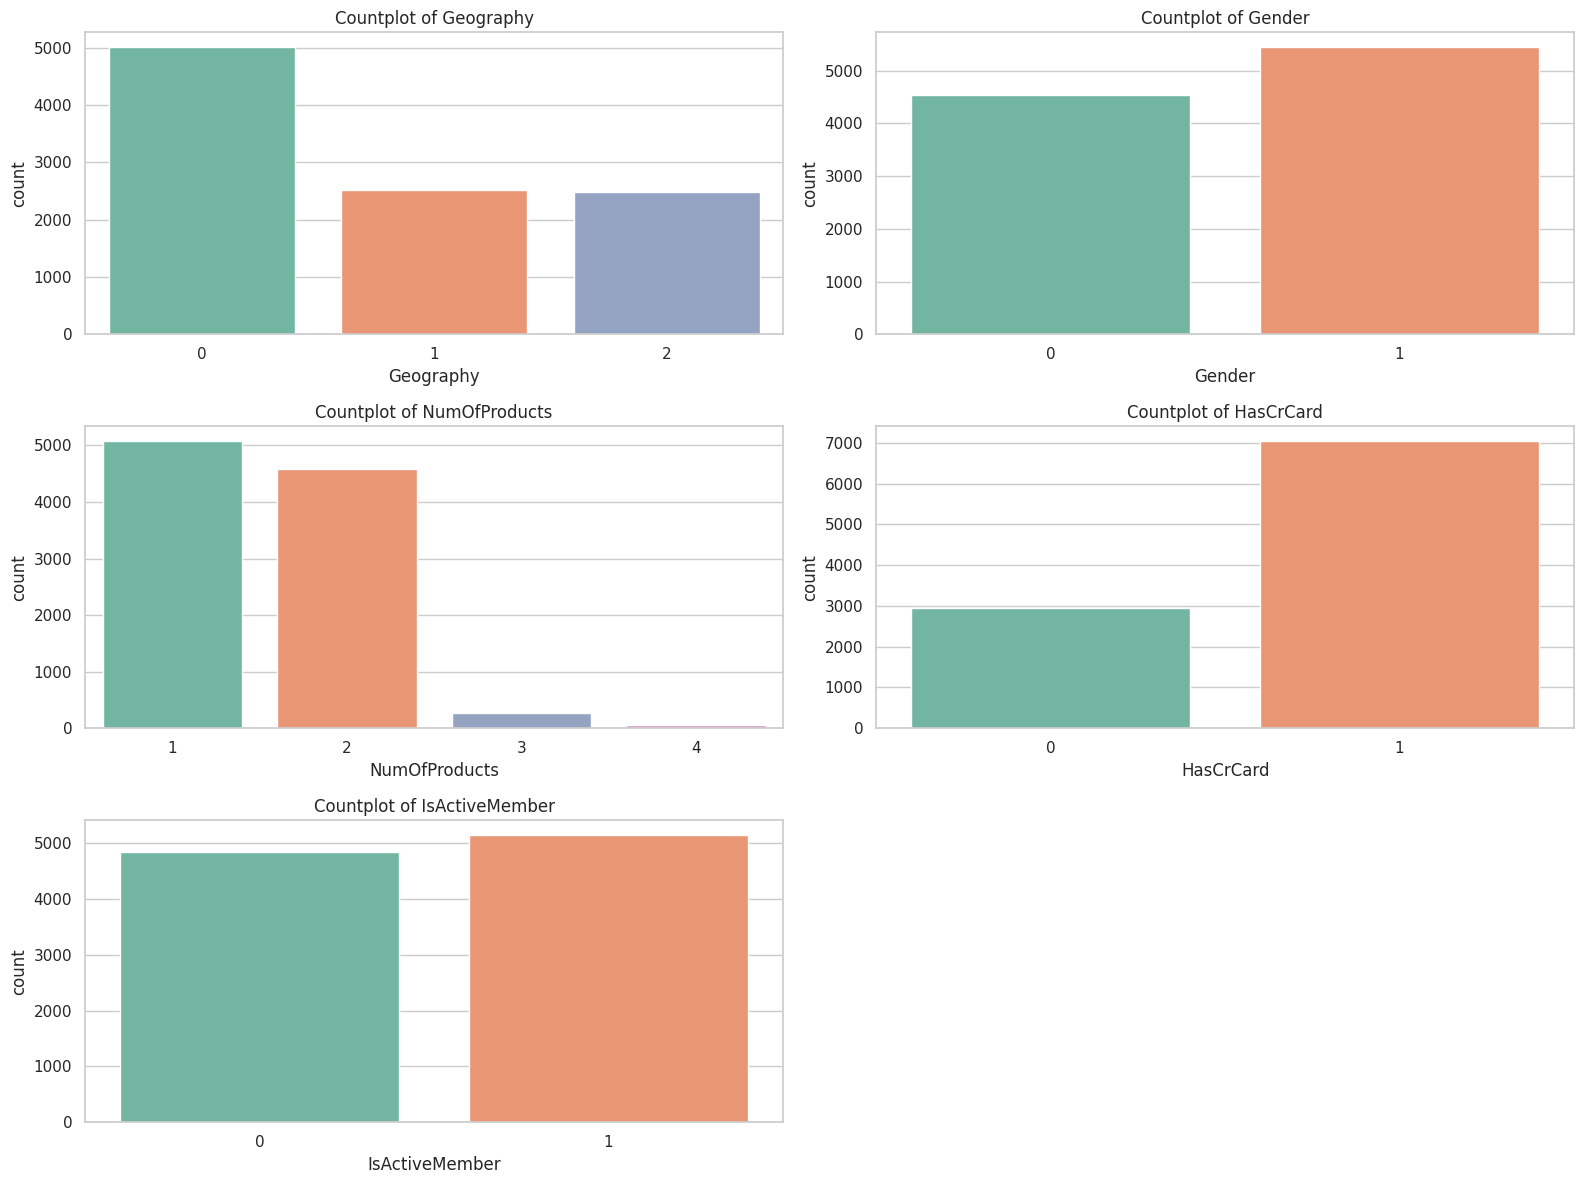

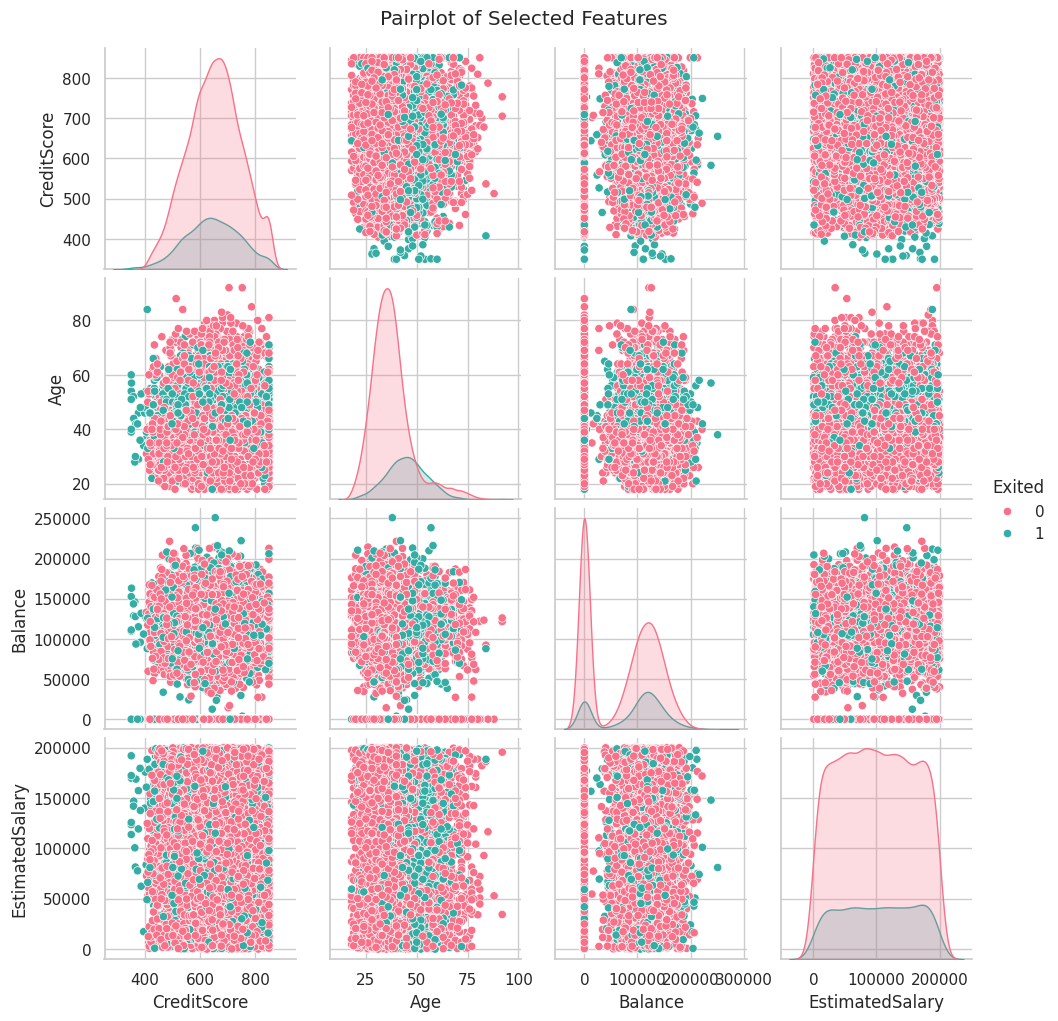

In [84]:
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/Bank_Churn_label_encoded.csv')
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Churn Distribution (Exited)')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[num_features].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()
cat_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(df[selected_features], hue='Exited', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()
